In [47]:
import pandas as pd
import numpy as np
from pymongo import MongoClient
mongo_uri = "mongodb://localhost:27017"
connection = MongoClient(mongo_uri)

# CREATE DATABASE
database = connection['SDN_data']
# CREATE COLLECTION
collection = database['params']

In [48]:
!python --version

Python 2.7.17


In [49]:
data = pd.DataFrame(list(collection.find()))
data.head()

,_id,byteReceived,byteSent,delay,dst,linkUtilization,packetLoss,src,time
0,6235dd49abe203968b98ff38,759.0,759.0,64.0,of:0000000000000006,1.588E-4,0.0,of:0000000000000005,1647697225413
1,6235dd49abe203968b98ff39,759.0,829.0,1.0,of:0000000000000008,0.0,0.0,of:0000000000000005,1647697225413
2,6235dd49abe203968b98ff3a,481.0,759.0,2.0,of:0000000000000005,1.518E-4,0.0,of:0000000000000006,1647697225514
3,6235dd49abe203968b98ff3b,829.0,829.0,2.0,of:0000000000000007,1.588E-4,0.0,of:0000000000000006,1647697225514
4,6235dd53abe203968b98ff42,759.0,759.0,789.0,of:0000000000000006,1.588E-4,1.0,of:0000000000000005,1647697235501


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 9 columns):
_id                549 non-null object
byteReceived       549 non-null object
byteSent           549 non-null object
delay              549 non-null object
dst                549 non-null object
linkUtilization    549 non-null object
packetLoss         549 non-null object
src                549 non-null object
time               549 non-null object
dtypes: object(9)
memory usage: 38.7+ KB


In [51]:
columns = ['byteSent', 'byteReceived', 'delay', 'packetLoss', 'linkUtilization']

In [52]:
for col in columns:
    data[col] = data[col].astype(float)

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
# the size of A4 paper
plt.figure(figsize=(15,8))
#sns.lineplot(data=data['delay'])

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

In [54]:
data['time'] = data['time'].astype(int)

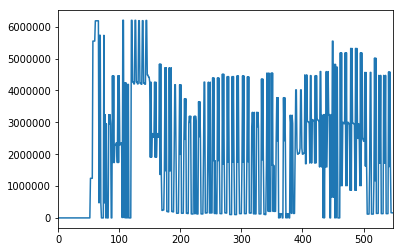

In [55]:
data['byteSent'].plot()

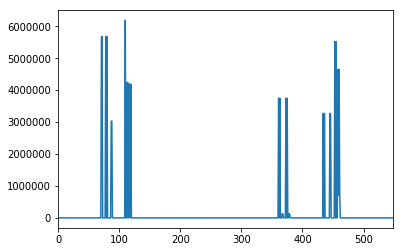

In [56]:
data['byteReceived'].plot()

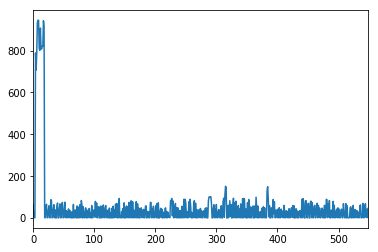

In [57]:
data['delay'].plot()

In [58]:
count_labels = 0
times = data['time'].values
first_time = times[0]
kq = []
for time in times:
    if first_time + 100000 > time:
        kq.append(count_labels)
    else:
        count_labels += 1
        first_time = time
        kq.append(count_labels)


In [59]:
len(kq)

549

In [60]:
data['label_time'] = kq

In [61]:
data

,_id,byteReceived,byteSent,delay,dst,linkUtilization,packetLoss,src,time,label_time
0,6235dd49abe203968b98ff38,759.0,759.0,64.0,of:0000000000000006,0.000159,0.0,of:0000000000000005,1647697225413,0
1,6235dd49abe203968b98ff39,759.0,829.0,1.0,of:0000000000000008,0.000000,0.0,of:0000000000000005,1647697225413,0
2,6235dd49abe203968b98ff3a,481.0,759.0,2.0,of:0000000000000005,0.000152,0.0,of:0000000000000006,1647697225514,0
3,6235dd49abe203968b98ff3b,829.0,829.0,2.0,of:0000000000000007,0.000159,0.0,of:0000000000000006,1647697225514,0
4,6235dd53abe203968b98ff42,759.0,759.0,789.0,of:0000000000000006,0.000159,1.0,of:0000000000000005,1647697235501,0
5,6235dd53abe203968b98ff43,829.0,829.0,707.0,of:0000000000000007,0.000159,1.0,of:0000000000000006,1647697235519,0
6,6235dd53abe203968b98ff44,759.0,829.0,789.0,of:0000000000000008,0.000000,1.0,of:0000000000000005,1647697235498,0
7,6235dd53abe203968b98ff45,759.0,759.0,934.0,of:0000000000000006,0.000159,0.0,of:0000000000000005,1647697235646,0
8,6235dd53abe203968b98ff47,759.0,829.0,945.0,of:0000000000000008,0.000000,0.0,of:0000000000000005,1647697235657,0
9,6235dd53abe203968b98ff46,829.0,829.0,945.0,of:0000000000000007,0.000159,0.0,of:0000000000000006,1647697235656,0


In [62]:
kq_tich = []
for i, cluster in data.groupby('label_time'):
    kq_tich.append(np.prod(cluster['delay'] + 0.001))
    

In [63]:
kq_tich = np.array(kq_tich)

In [64]:
df = pd.DataFrame(kq_tich)


df.to_csv("/home/onos/Downloads/flaskSDN/phanTichDijsktra.csv", index = False, header=False)

In [65]:
kq_tich

array([8.93494771e+153, 7.95440801e+268, 2.27162930e+148])

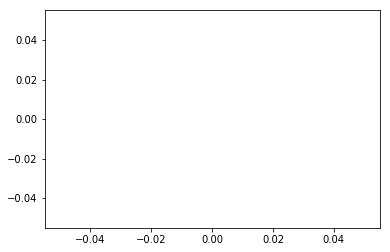

In [66]:
# dijktra 
plt.plot(kq_tich[4:])

In [67]:
def get_min_max_scale(x):
    print(x)    
    min, max = x.min(), x.max()
    #print("MIN = ", min, "MAX = ", max)
    # cong them 0.1 de tranh mau so bang 0 
    x_scaled = (x - min) / (max - min + 0.1)
    return x_scaled

In [68]:
import numpy as np

In [69]:
column = ['delay', 'byteSent']
for col in column:
    print(data[col])
    data[col] = get_min_max_scale(data[col])

0       64.0
1        1.0
2        2.0
3        2.0
4      789.0
5      707.0
6      789.0
7      934.0
8      945.0
9      945.0
10     812.0
11     801.0
12     908.0
13     812.0
14     807.0
15     821.0
16     821.0
17     943.0
18     913.0
19       2.0
20       2.0
21      56.0
22      66.0
23       2.0
24       2.0
25      36.0
26      59.0
27       2.0
28       2.0
29      88.0
       ...  
519     50.0
520     54.0
521      1.0
522     45.0
523      2.0
524     61.0
525      2.0
526      2.0
527     41.0
528     36.0
529      2.0
530     36.0
531      2.0
532     29.0
533      2.0
534      2.0
535     60.0
536     63.0
537      1.0
538      3.0
539      3.0
540     70.0
541      2.0
542      2.0
543     53.0
544     69.0
545      4.0
546     42.0
547      2.0
548     46.0
Name: delay, Length: 549, dtype: float64
0       64.0
1        1.0
2        2.0
3        2.0
4      789.0
5      707.0
6      789.0
7      934.0
8      945.0
9      945.0
10     812.0
11     801.0
12     908